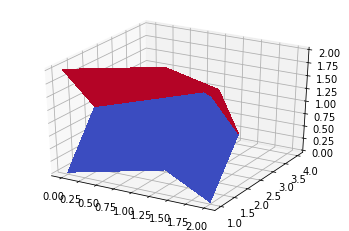

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
matrix = np.array([[1, 2, 1], [2,4,2], [1, 2, 1]])
z, x = matrix.shape
Z = np.arange(0, z, 1)
X = np.arange(0, x, 1)
Z, X = np.meshgrid(Z, X)
Y = matrix[Z, X]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap = cm.coolwarm)

plt.show()

# img_mat = convert_image_matrix(img_name)
# identity_kernel = np.array([[0, 0, 0,0,0],
#                             [0,0, 1,0, 0],
#                             [0,0, 1,0, 0],
#                             [0,0, 1,0, 0],
#                             [0, 0, 0, 0,0]])

# img_sampling = get_sub_matrices(matrix, identity_kernel.shape)
# transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
# original_VS_convoluted(img_name,'identity', transform_mat)

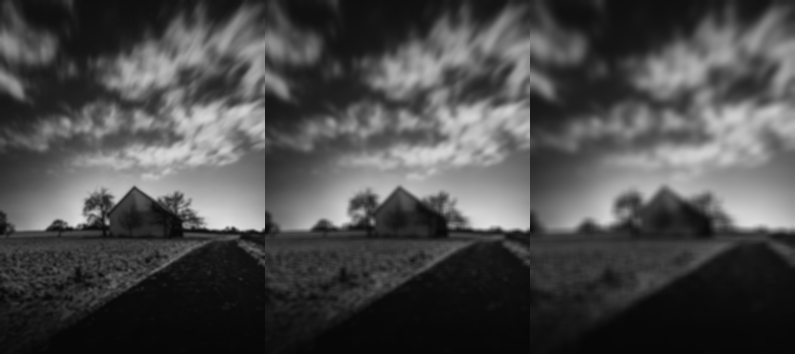

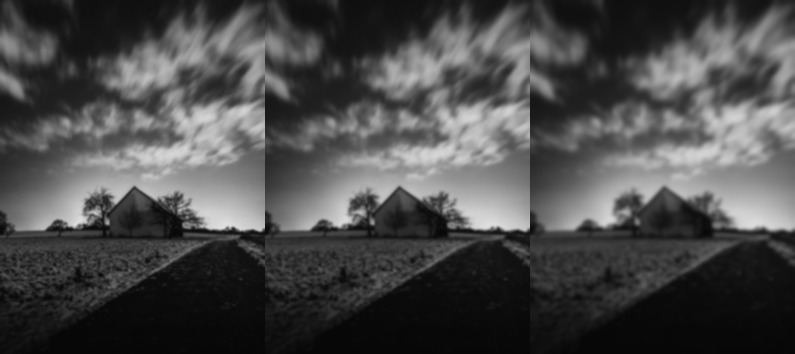

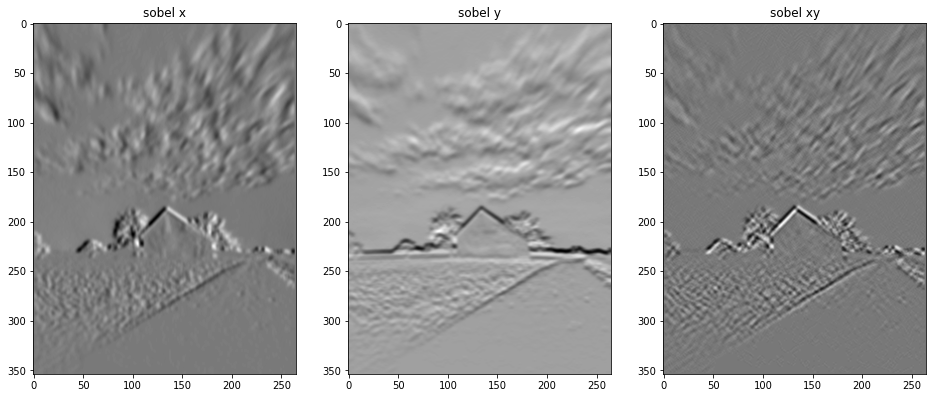

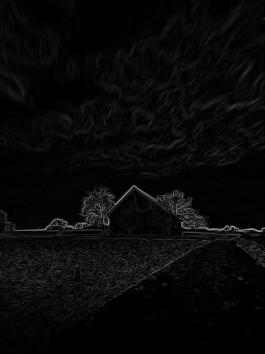

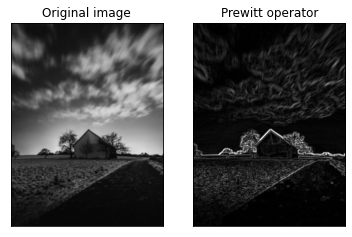

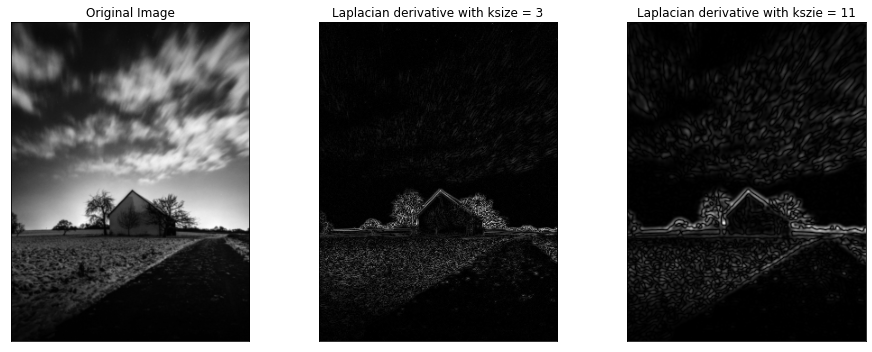

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from scipy import ndimage
import matplotlib.pyplot as plt

image = cv2.imread('/content/house-downsampled.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Average Blur
blurred_1 = np.hstack([
  cv2.blur(image,(3,3)),
  cv2.blur(image,(5,5)),
  cv2.blur(image,(9,9))])  
cv2_imshow(blurred_1)

# Gaussian blurring
Gaussian_blurred_1 = np.hstack([
  cv2.GaussianBlur(image,(3,3),0),
  cv2.GaussianBlur(image,(5,5),0),
  cv2.GaussianBlur(image,(9,9),0)])  
cv2_imshow(Gaussian_blurred_1)

# Sobel Edge Detection
I_gaussian_blur1 = cv2.GaussianBlur(gray,(5,5),2,cv2.BORDER_DEFAULT)

sobelx = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

plt.figure(figsize=(16, 16))

plt.subplot(1,3,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,3,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')

plt.subplot(1,3,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()
  
# Robert Edge Detection
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )

roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )

img = cv2.imread("/content/house-downsampled.png",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2_imshow(edged_img)

# Prewitt operator
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]],dtype=int)
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype=int)

x = cv2.filter2D(gray, cv2.CV_16S, kernelx)
y = cv2.filter2D(gray, cv2.CV_16S, kernely)

# Turn uint8, image fusion
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Display graphics
titles = ['Original image','Prewitt operator']
images = [image, Prewitt]

for i in range(2):
  plt.subplot(1, 2, i + 1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])
plt.show()

# Laplacian 
image = cv2.imread('/content/house-downsampled.png',0) 

lap_1 = cv2.Laplacian(image, cv2.CV_64F,ksize = 3) 
lap_1_abs = np.uint(np.absolute(lap_1)) 

lap_2 = cv2.Laplacian(image, cv2.CV_64F, ksize=11) 
lap_2_abs = np.uint(np.absolute(lap_2)) 

titles = ['Original Image',"Laplacian derivative with ksize = 3", 'Laplacian derivative with kszie = 11']
images = [image,lap_1_abs,lap_2_abs]
plt.figure(figsize=(13,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/tiger_noise.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

colors = ('b','g','r')

# compute and plot the image histograms
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.hist(hist, color=color)

plt.title('Image Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.show()

figure_size = 5

# new_image1 = cv2.blur(image,(figure_size, figure_size))
# new_image2 = cv2.GaussianBlur(image, (figure_size, figure_size),0)
img = cv2.medianBlur(image, figure_size)
# new_image4 = cv2.Laplacian(image,cv2.CV_64F)

# This is a Gaussian noise

# cv2_imshow(new_image1)
# cv2_imshow(new_image2)
cv2_imshow(img)
# cv2_imshow(new_image4)

# convolute with proper kernels
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()